In [306]:
#Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqline
import scipy.stats as scistat

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Loading data and checking the first few columns _ Selecting only 200000 rows
df1= pd.read_csv("Data/Santander data .csv", nrows=200000)


In [633]:
df1.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [334]:
# Doesnt have values
ColumnsToRemove= df1.filter(like="_ult1")

In [337]:
ColumnsToRemove.describe

<bound method NDFrame.describe of Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[200000 rows x 0 columns]>

In [634]:
#Checking columns for df1
df1.columns


Index(['fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia', 'sexo',
       'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel',
       'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext',
       'conyuemp', 'canal_entrada', 'indfall', 'tipodom', 'cod_prov',
       'nomprov', 'ind_actividad_cliente', 'renta', 'segmento',
       'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1'],
      dtype='object')

In [187]:
#Extracting columns with similar characters
ColumnsToRemove= df1.filter(like="_ult1").columns.tolist()

In [188]:
ColumnsToRemove

['ind_ahor_fin_ult1',
 'ind_aval_fin_ult1',
 'ind_cco_fin_ult1',
 'ind_cder_fin_ult1',
 'ind_cno_fin_ult1',
 'ind_ctju_fin_ult1',
 'ind_ctma_fin_ult1',
 'ind_ctop_fin_ult1',
 'ind_ctpp_fin_ult1',
 'ind_deco_fin_ult1',
 'ind_deme_fin_ult1',
 'ind_dela_fin_ult1',
 'ind_ecue_fin_ult1',
 'ind_fond_fin_ult1',
 'ind_hip_fin_ult1',
 'ind_plan_fin_ult1',
 'ind_pres_fin_ult1',
 'ind_reca_fin_ult1',
 'ind_tjcr_fin_ult1',
 'ind_valo_fin_ult1',
 'ind_viv_fin_ult1',
 'ind_nomina_ult1',
 'ind_nom_pens_ult1',
 'ind_recibo_ult1']

In [189]:
#Droping columns that are not useful
df1.drop(columns=ColumnsToRemove, inplace=True)

In [190]:
df1

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,N,NaN,KHL,N,1.0,29.0,MALAGA,1.0,87218.10,02 - PARTICULARES
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,S,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,35548.74,03 - UNIVERSITARIO
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,N,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,122179.11,03 - UNIVERSITARIO
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,N,NaN,KHD,N,1.0,50.0,ZARAGOZA,0.0,119775.54,03 - UNIVERSITARIO
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,N,NaN,KHE,N,1.0,50.0,ZARAGOZA,1.0,NaN,03 - UNIVERSITARIO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,2015-01-28,1354292,N,ES,V,24,2014-11-13,0.0,8,1.0,...,S,NaN,KHE,N,1.0,50.0,ZARAGOZA,0.0,56470.62,03 - UNIVERSITARIO
199996,2015-01-28,1354294,N,ES,V,22,2014-11-13,0.0,8,1.0,...,N,NaN,KHE,N,1.0,3.0,ALICANTE,0.0,123069.27,03 - UNIVERSITARIO
199997,2015-01-28,1354327,N,ES,V,25,2014-11-13,0.0,8,1.0,...,N,NaN,KHE,N,1.0,29.0,MALAGA,0.0,NaN,03 - UNIVERSITARIO
199998,2015-01-28,1354328,N,ES,V,22,2014-11-13,0.0,8,1.0,...,N,NaN,KHE,N,1.0,19.0,GUADALAJARA,0.0,121067.40,03 - UNIVERSITARIO


In [639]:
df1.shape

(200000, 24)

In [640]:
df1.columns

Index(['fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia', 'sexo',
       'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel',
       'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext',
       'conyuemp', 'canal_entrada', 'indfall', 'tipodom', 'cod_prov',
       'nomprov', 'ind_actividad_cliente', 'renta', 'segmento'],
      dtype='object')

In [3]:
# Loading f2 data
df2= pd.read_csv("Data/santander_Product.csv")

C:\Users\trymo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3185: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [642]:
df2.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento
0,2016-06-28,15889,F,ES,V,56,1995-01-16,0,256,1,...,N,N,KAT,N,1,28.0,MADRID,1,326124.90,01 - TOP
1,2016-06-28,1170544,N,ES,H,36,2013-08-28,0,34,1,...,N,NaN,KAT,N,1,3.0,ALICANTE,0,NA,02 - PARTICULARES
2,2016-06-28,1170545,N,ES,V,22,2013-08-28,0,34,1,...,N,NaN,KHE,N,1,15.0,"CORUÑA, A",1,NA,03 - UNIVERSITARIO
3,2016-06-28,1170547,N,ES,H,22,2013-08-28,0,34,1,...,N,NaN,KHE,N,1,8.0,BARCELONA,0,148402.98,03 - UNIVERSITARIO
4,2016-06-28,1170548,N,ES,H,22,2013-08-28,0,34,1,...,N,NaN,KHE,N,1,7.0,"BALEARS, ILLES",0,106885.80,03 - UNIVERSITARIO


In [643]:
# Checking dimension of the data
df2.shape

(929615, 24)

In [644]:
#Checking columns for df2 
df2.columns

Index(['fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia', 'sexo',
       'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel',
       'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext',
       'conyuemp', 'canal_entrada', 'indfall', 'tipodom', 'cod_prov',
       'nomprov', 'ind_actividad_cliente', 'renta', 'segmento'],
      dtype='object')

In [192]:
# Combining the df1 and df2
df = pd.concat([df1, df2])

In [193]:
# Checking the resulting data
df

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,N,NaN,KHL,N,1.0,29.0,MALAGA,1.0,87218.1,02 - PARTICULARES
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,S,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,35548.74,03 - UNIVERSITARIO
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,N,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,122179.11,03 - UNIVERSITARIO
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,N,NaN,KHD,N,1.0,50.0,ZARAGOZA,0.0,119775.54,03 - UNIVERSITARIO
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,N,NaN,KHE,N,1.0,50.0,ZARAGOZA,1.0,NaN,03 - UNIVERSITARIO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929610,2016-06-28,660237,N,ES,V,55,1999-04-21,0.0,206,1.0,...,N,NaN,KAT,N,1.0,28.0,MADRID,1.0,128643.57,01 - TOP
929611,2016-06-28,660238,N,ES,V,30,2006-11-29,0.0,115,1.0,...,N,NaN,KFC,N,1.0,26.0,"RIOJA, LA",0.0,NA,02 - PARTICULARES
929612,2016-06-28,660240,N,ES,V,52,2006-11-29,0.0,115,1.0,...,N,NaN,KBZ,N,1.0,33.0,ASTURIAS,1.0,72765.27,02 - PARTICULARES
929613,2016-06-28,660243,N,ES,V,32,2006-11-29,0.0,115,1.0,...,N,NaN,KFC,N,1.0,33.0,ASTURIAS,0.0,147488.88,02 - PARTICULARES


In [690]:
df.columns

Index(['Data_Date', 'Customer_code', 'customer employee status', '', 'sex',
       'age', 'Entry_Date', 'customer_Status', 'seniority',
       'primary_customer_Begn', 'indrel_1mes', 'tiprel_1mes', 'indresi',
       'indext', 'canal_entrada', 'indfall', 'tipodom', 'Province name',
       'customer_active', 'gross income', 'segmentation'],
      dtype='object')

In [691]:
df.shape

(1129615, 21)

In [692]:
df.duplicated().any()

False

In [199]:
# Renaming the columns using familiar names ( from spanish to English)
df.rename(columns = {'fecha_alta':'Entry_Date','fecha_dato':'Data_Date','ind_empleado':'Employee index','nomprov':'Province name', 'renta':'gross income','ncodpers':'Customer_code','ind_empleado':'customer employee status','pais_residencia':'','sexo':'sex','ind_nuevo':'customer_Status','antiguedad':'seniority','indrel':'primary_customer_Begn','segmento':'segmentation','ind_actividad_cliente':'customer_active'}, inplace = True)

In [ ]:
# hembra represents  female & Male is masculino in Sapanish. I will switch the codes as follows: H:Female and V:Male 

In [715]:
df['sex'].replace({'H':'Female','V':'Male'},inplace=True)

In [695]:
df.head()

,Data_Date,Customer_code,customer employee status,,sex,age,Entry_Date,customer_Status,seniority,primary_customer_Begn,...,tiprel_1mes,indresi,indext,canal_entrada,indfall,tipodom,Province name,customer_active,gross income,segmentation
0,2015-01-28,1375586,N,ES,Female,35,2015-01-12,0.0,6,1.0,...,A,S,N,KHL,N,1.0,MALAGA,1.0,87218.1,02 - PARTICULARES
1,2015-01-28,1050611,N,ES,Male,23,2012-08-10,0.0,35,1.0,...,I,S,S,KHE,N,1.0,CIUDAD REAL,0.0,35548.74,03 - UNIVERSITARIO
2,2015-01-28,1050612,N,ES,Male,23,2012-08-10,0.0,35,1.0,...,I,S,N,KHE,N,1.0,CIUDAD REAL,0.0,122179.11,03 - UNIVERSITARIO
3,2015-01-28,1050613,N,ES,Female,22,2012-08-10,0.0,35,1.0,...,I,S,N,KHD,N,1.0,ZARAGOZA,0.0,119775.54,03 - UNIVERSITARIO
4,2015-01-28,1050614,N,ES,Male,23,2012-08-10,0.0,35,1.0,...,A,S,N,KHE,N,1.0,ZARAGOZA,1.0,NaN,03 - UNIVERSITARIO


In [651]:
# Checking uniqueness of customer code
df.Customer_code.nunique()

934264

In [652]:
setIndex = Santandercon['Customer_code']

In [653]:
setIndex.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            929605, 929606, 929607, 929608, 929609, 929610, 929611, 929612,
            929613, 929614],
           dtype='int64', length=1129615)

In [654]:
# Converting time to date time data
df['Entry_Date'] = pd.to_datetime(df['Entry_Date'])
df['Data_Date'] = pd.to_datetime(df['Data_Date'])

In [696]:
df

,Data_Date,Customer_code,customer employee status,,sex,age,Entry_Date,customer_Status,seniority,primary_customer_Begn,...,tiprel_1mes,indresi,indext,canal_entrada,indfall,tipodom,Province name,customer_active,gross income,segmentation
0,2015-01-28,1375586,N,ES,Female,35,2015-01-12,0.0,6,1.0,...,A,S,N,KHL,N,1.0,MALAGA,1.0,87218.1,02 - PARTICULARES
1,2015-01-28,1050611,N,ES,Male,23,2012-08-10,0.0,35,1.0,...,I,S,S,KHE,N,1.0,CIUDAD REAL,0.0,35548.74,03 - UNIVERSITARIO
2,2015-01-28,1050612,N,ES,Male,23,2012-08-10,0.0,35,1.0,...,I,S,N,KHE,N,1.0,CIUDAD REAL,0.0,122179.11,03 - UNIVERSITARIO
3,2015-01-28,1050613,N,ES,Female,22,2012-08-10,0.0,35,1.0,...,I,S,N,KHD,N,1.0,ZARAGOZA,0.0,119775.54,03 - UNIVERSITARIO
4,2015-01-28,1050614,N,ES,Male,23,2012-08-10,0.0,35,1.0,...,A,S,N,KHE,N,1.0,ZARAGOZA,1.0,NaN,03 - UNIVERSITARIO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929610,2016-06-28,660237,N,ES,Male,55,1999-04-21,0.0,206,1.0,...,A,S,N,KAT,N,1.0,MADRID,1.0,128643.57,01 - TOP
929611,2016-06-28,660238,N,ES,Male,30,2006-11-29,0.0,115,1.0,...,I,S,N,KFC,N,1.0,"RIOJA, LA",0.0,NA,02 - PARTICULARES
929612,2016-06-28,660240,N,ES,Male,52,2006-11-29,0.0,115,1.0,...,A,S,N,KBZ,N,1.0,ASTURIAS,1.0,72765.27,02 - PARTICULARES
929613,2016-06-28,660243,N,ES,Male,32,2006-11-29,0.0,115,1.0,...,I,S,N,KFC,N,1.0,ASTURIAS,0.0,147488.88,02 - PARTICULARES


In [717]:
df.drop(['conyuemp','ult_fec_cli_1t','cod_prov'],axis=1,inplace=True)

In [823]:
# Checking data types
df.dtypes.tolist()

[dtype('<M8[ns]'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('<M8[ns]'),
 dtype('float64'),
 dtype('O'),
 dtype('float64'),
 dtype('float64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('float64'),
 dtype('O'),
 dtype('float64'),
 dtype('O'),
 dtype('O')]

In [ ]:
# Data Visualisation for Categorical data

<AxesSubplot:>

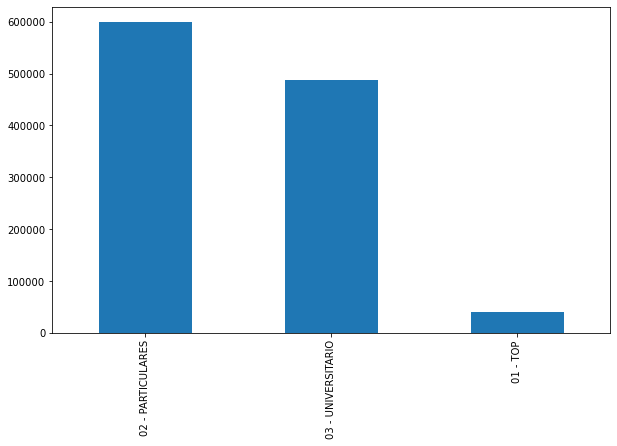

In [30]:

df['segmentation'].value_counts().plot(kind='bar')

<AxesSubplot:>

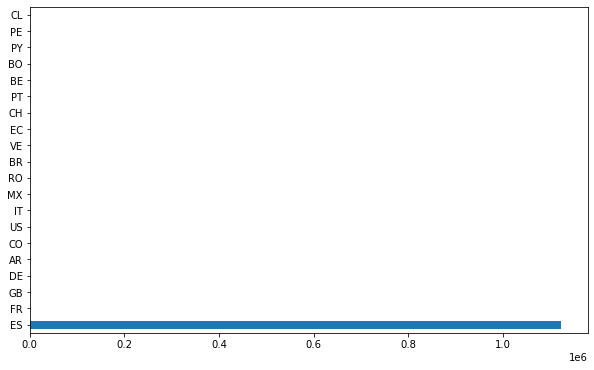

In [31]:
df[''].value_counts()[:20].plot(kind='barh')

<AxesSubplot:>

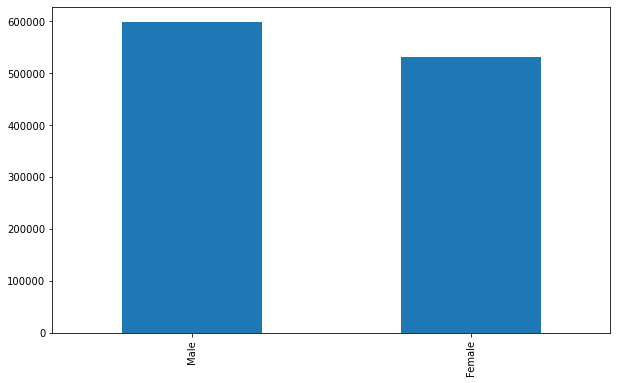

In [32]:
df['sex'].value_counts()[:20].plot(kind='bar')

<AxesSubplot:>

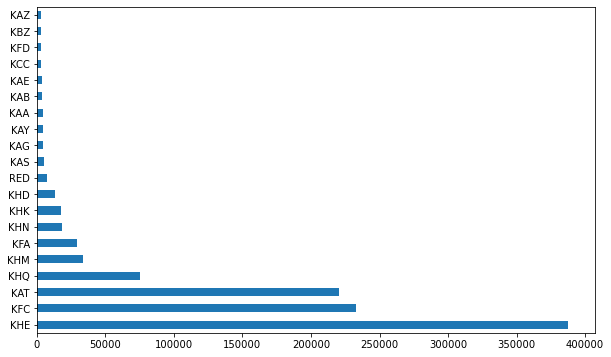

In [33]:
df['canal_entrada'].value_counts()[:20].plot(kind='barh')

<AxesSubplot:>

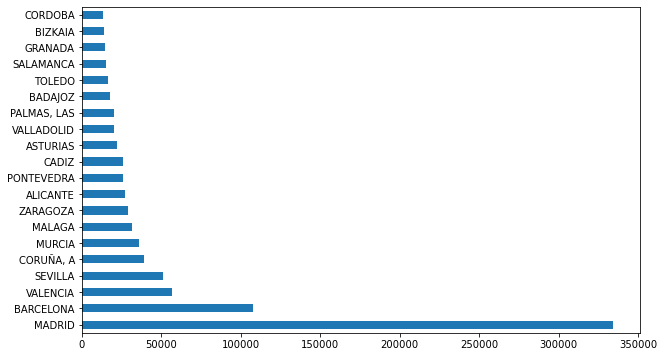

In [35]:
df['Province name'].value_counts()[:20].plot(kind='barh')

In [824]:
# Using the lock function incase the system crashes
df= df.iloc[:900000]

In [825]:
df

,Data_Date,Customer_code,customer employee status,,sex,age,Entry_Date,customer_Status,seniority,primary_customer_Begn,...,tiprel_1mes,indresi,indext,canal_entrada,indfall,tipodom,Province name,customer_active,gross income,segmentation
0,2015-01-28,1375586,N,ES,Female,35,2015-01-12,0.0,6,1.0,...,A,S,N,KHL,N,1.0,MALAGA,1.0,87218.1,02 - PARTICULARES
1,2015-01-28,1050611,N,ES,Male,23,2012-08-10,0.0,35,1.0,...,I,S,S,KHE,N,1.0,CIUDAD REAL,0.0,35548.74,03 - UNIVERSITARIO
2,2015-01-28,1050612,N,ES,Male,23,2012-08-10,0.0,35,1.0,...,I,S,N,KHE,N,1.0,CIUDAD REAL,0.0,122179.11,03 - UNIVERSITARIO
3,2015-01-28,1050613,N,ES,Female,22,2012-08-10,0.0,35,1.0,...,I,S,N,KHD,N,1.0,ZARAGOZA,0.0,119775.54,03 - UNIVERSITARIO
4,2015-01-28,1050614,N,ES,Male,23,2012-08-10,0.0,35,1.0,...,A,S,N,KHE,N,1.0,ZARAGOZA,1.0,NaN,03 - UNIVERSITARIO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699995,2016-06-28,854623,N,ES,Female,33,2009-10-19,0.0,80,1.0,...,I,S,N,KAB,N,1.0,ZARAGOZA,0.0,126535.80,02 - PARTICULARES
699996,2016-06-28,854631,N,DE,Male,40,2009-10-19,0.0,80,1.0,...,A,N,S,KAT,N,1.0,NaN,1.0,NA,02 - PARTICULARES
699997,2016-06-28,854632,N,ES,Female,66,2009-10-19,0.0,80,1.0,...,I,S,N,KAB,N,1.0,ZARAGOZA,0.0,66894.81,02 - PARTICULARES
699998,2016-06-28,854635,N,ES,Male,35,2009-10-19,0.0,6,1.0,...,A,S,N,KHM,N,1.0,MADRID,1.0,NA,01 - TOP


In [609]:
df.head()

,Data_Date,Customer_code,customer employee status,Uknown,sex,age,Entry_Date,customer_Status,seniority,primary_customer_Begn,...,tiprel_1mes,indresi,indext,canal_entrada,indfall,tipodom,Province name,customer_active,gross income,segmentation
0,2015-01-28,1375586,N,ES,Female,35,2015-01-12,0.0,6,1.0,...,A,S,N,KHL,N,1.0,MALAGA,1.0,87218.1,02 - PARTICULARES
1,2015-01-28,1050611,N,ES,Male,23,2012-08-10,0.0,35,1.0,...,I,S,S,KHE,N,1.0,CIUDAD REAL,0.0,35548.74,03 - UNIVERSITARIO
2,2015-01-28,1050612,N,ES,Male,23,2012-08-10,0.0,35,1.0,...,I,S,N,KHE,N,1.0,CIUDAD REAL,0.0,122179.11,03 - UNIVERSITARIO
3,2015-01-28,1050613,N,ES,Female,22,2012-08-10,0.0,35,1.0,...,I,S,N,KHD,N,1.0,ZARAGOZA,0.0,119775.54,03 - UNIVERSITARIO
4,2015-01-28,1050614,N,ES,Male,23,2012-08-10,0.0,35,1.0,...,A,S,N,KHE,N,1.0,ZARAGOZA,1.0,NaN,03 - UNIVERSITARIO


In [677]:
df.shape

(0, 24)

In [794]:
df.loc[(df.age >= 30) & (df.age <= 100)]


,Data_Date,Customer_code,customer employee status,Uknown,sex,age,Entry_Date,customer_Status,seniority,primary_customer_Begn,...,tiprel_1mes,indresi,indext,canal_entrada,indfall,tipodom,Province name,customer_active,gross income,segmentation
0,2015-01-28,1375586,N,ES,Female,35,2015-01-12,0.0,6,1.0,...,A,S,N,KHL,N,1.0,MALAGA,1.0,87218.10,02 - PARTICULARES
13,2015-01-28,1050624,N,ES,Female,65,2012-08-10,0.0,35,1.0,...,A,S,N,KHE,N,1.0,ZARAGOZA,1.0,61605.09,02 - PARTICULARES
34,2015-01-28,1050604,N,ES,Female,53,2012-08-10,0.0,35,1.0,...,A,S,N,KHE,N,1.0,SALAMANCA,0.0,113279.10,02 - PARTICULARES
39,2015-01-28,1050669,N,ES,Male,32,2012-08-10,0.0,35,1.0,...,A,S,N,KFC,N,1.0,MALAGA,1.0,171398.85,02 - PARTICULARES
40,2015-01-28,1050670,N,ES,Male,37,2012-08-10,0.0,35,1.0,...,A,S,N,KFC,N,1.0,SALAMANCA,1.0,64031.25,02 - PARTICULARES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929610,2016-06-28,660237,N,ES,Male,55,1999-04-21,0.0,206,1.0,...,A,S,N,KAT,N,1.0,MADRID,1.0,128643.57,01 - TOP
929611,2016-06-28,660238,N,ES,Male,30,2006-11-29,0.0,115,1.0,...,I,S,N,KFC,N,1.0,"RIOJA, LA",0.0,NaN,02 - PARTICULARES
929612,2016-06-28,660240,N,ES,Male,52,2006-11-29,0.0,115,1.0,...,A,S,N,KBZ,N,1.0,ASTURIAS,1.0,72765.27,02 - PARTICULARES
929613,2016-06-28,660243,N,ES,Male,32,2006-11-29,0.0,115,1.0,...,I,S,N,KFC,N,1.0,ASTURIAS,0.0,147488.88,02 - PARTICULARES


In [514]:
#Santandercon.isnull().sum().loc[lambda x: x>=0]

In [671]:
df.shape

(1129615, 24)

In [614]:
df.describe()

,Customer_code,customer_Status,primary_customer_Begn,indrel_1mes,tipodom,customer_active
count,1.200000e+05,119115.000000,119115.000000,119115.000000,119115.0,119115.000000
mean,1.019832e+06,0.000193,1.132460,1.000050,1.0,0.439239
std,7.487930e+04,0.013894,3.600509,0.010037,0.0,0.496297
min,8.739260e+05,0.000000,1.000000,1.000000,1.0,0.000000
25%,9.416478e+05,0.000000,1.000000,1.000000,1.0,0.000000
50%,1.040438e+06,0.000000,1.000000,1.000000,1.0,0.000000
75%,1.081304e+06,0.000000,1.000000,1.000000,1.0,1.000000
max,1.375586e+06,1.000000,99.000000,3.000000,1.0,1.000000


In [200]:
# Checking value counts for the unkown column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1129615 entries, 0 to 929614
Data columns (total 24 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Data_Date                 1129615 non-null  object 
 1   Customer_code             1129615 non-null  int64  
 2   customer employee status  1127678 non-null  object 
 3                             1127678 non-null  object 
 4   sex                       1127673 non-null  object 
 5   age                       1127678 non-null  float64
 6   Entry_Date                1127678 non-null  object 
 7   customer_Status           1127678 non-null  float64
 8   seniority                 1129615 non-null  object 
 9   primary_customer_Begn     1127678 non-null  float64
 10  ult_fec_cli_1t            2008 non-null     object 
 11  indrel_1mes               1127655 non-null  float64
 12  tiprel_1mes               1127655 non-null  object 
 13  indresi                   11

In [663]:
df[''].value_counts()

ES    118986
GB        16
DE        12
MX        11
CO        10
FR         8
CH         6
PT         5
US         4
CL         4
IT         4
DO         3
FI         3
BE         3
AR         3
VE         3
NL         2
BR         2
IE         2
EC         2
PE         2
HN         2
AE         2
CN         2
IN         1
RO         1
HK         1
PL         1
MA         1
AT         1
PR         1
GR         1
MZ         1
CA         1
TW         1
CZ         1
NI         1
AL         1
SE         1
CR         1
AD         1
IL         1
Name: , dtype: int64

In [ ]:
#There is an empty column header.I will rename it 'Uknown' 
df.rename(columns = {"" : "Uknown"}, inplace = True)

In [745]:
df["Data_Date"] = pd.to_datetime(df["Data_Date"],format="%Y-%m-%d")
df["Entry_Date"] = pd.to_datetime(df["Entry_Date"],format="%Y-%m-%d")
df["Data_Date"].unique()

array(['2015-01-28T00:00:00.000000000', '2016-06-28T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [716]:
#Checking total missing values
df.isnull().sum()

Data_Date                         0
Customer_code                     0
customer employee status       1937
                               1937
sex                            1942
age                               0
Entry_Date                     1937
customer_Status                1937
seniority                         0
primary_customer_Begn          1937
ult_fec_cli_1t              1127607
indrel_1mes                    1960
tiprel_1mes                    1960
indresi                        1937
indext                         1937
conyuemp                    1129511
canal_entrada                  4029
indfall                        1937
tipodom                        1937
cod_prov                       6336
Province name                  6336
customer_active                1937
gross income                  37005
segmentation                   4199
dtype: int64

In [720]:
df[df.notna().all(axis=1)]

,Data_Date,Customer_code,customer employee status,,sex,age,Entry_Date,customer_Status,seniority,primary_customer_Begn,...,tiprel_1mes,indresi,indext,canal_entrada,indfall,tipodom,Province name,customer_active,gross income,segmentation
0,2015-01-28,1375586,N,ES,Female,35,2015-01-12,0.0,6,1.0,...,A,S,N,KHL,N,1.0,MALAGA,1.0,87218.1,02 - PARTICULARES
1,2015-01-28,1050611,N,ES,Male,23,2012-08-10,0.0,35,1.0,...,I,S,S,KHE,N,1.0,CIUDAD REAL,0.0,35548.74,03 - UNIVERSITARIO
2,2015-01-28,1050612,N,ES,Male,23,2012-08-10,0.0,35,1.0,...,I,S,N,KHE,N,1.0,CIUDAD REAL,0.0,122179.11,03 - UNIVERSITARIO
3,2015-01-28,1050613,N,ES,Female,22,2012-08-10,0.0,35,1.0,...,I,S,N,KHD,N,1.0,ZARAGOZA,0.0,119775.54,03 - UNIVERSITARIO
5,2015-01-28,1050615,N,ES,Female,23,2012-08-10,0.0,35,1.0,...,I,S,N,KHE,N,1.0,TOLEDO,0.0,22220.04,03 - UNIVERSITARIO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929610,2016-06-28,660237,N,ES,Male,55,1999-04-21,0.0,206,1.0,...,A,S,N,KAT,N,1.0,MADRID,1.0,128643.57,01 - TOP
929611,2016-06-28,660238,N,ES,Male,30,2006-11-29,0.0,115,1.0,...,I,S,N,KFC,N,1.0,"RIOJA, LA",0.0,NA,02 - PARTICULARES
929612,2016-06-28,660240,N,ES,Male,52,2006-11-29,0.0,115,1.0,...,A,S,N,KBZ,N,1.0,ASTURIAS,1.0,72765.27,02 - PARTICULARES
929613,2016-06-28,660243,N,ES,Male,32,2006-11-29,0.0,115,1.0,...,I,S,N,KFC,N,1.0,ASTURIAS,0.0,147488.88,02 - PARTICULARES


In [728]:
# Droping rows with NAN values.The data is too big for us to do that,otherwise we could have imputed
df=df.dropna()

In [729]:
df

,Data_Date,Customer_code,customer employee status,,sex,age,Entry_Date,customer_Status,seniority,primary_customer_Begn,...,tiprel_1mes,indresi,indext,canal_entrada,indfall,tipodom,Province name,customer_active,gross income,segmentation
0,2015-01-28,1375586,N,ES,Female,35,2015-01-12,0.0,6,1.0,...,A,S,N,KHL,N,1.0,MALAGA,1.0,87218.1,02 - PARTICULARES
1,2015-01-28,1050611,N,ES,Male,23,2012-08-10,0.0,35,1.0,...,I,S,S,KHE,N,1.0,CIUDAD REAL,0.0,35548.74,03 - UNIVERSITARIO
2,2015-01-28,1050612,N,ES,Male,23,2012-08-10,0.0,35,1.0,...,I,S,N,KHE,N,1.0,CIUDAD REAL,0.0,122179.11,03 - UNIVERSITARIO
3,2015-01-28,1050613,N,ES,Female,22,2012-08-10,0.0,35,1.0,...,I,S,N,KHD,N,1.0,ZARAGOZA,0.0,119775.54,03 - UNIVERSITARIO
5,2015-01-28,1050615,N,ES,Female,23,2012-08-10,0.0,35,1.0,...,I,S,N,KHE,N,1.0,TOLEDO,0.0,22220.04,03 - UNIVERSITARIO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929610,2016-06-28,660237,N,ES,Male,55,1999-04-21,0.0,206,1.0,...,A,S,N,KAT,N,1.0,MADRID,1.0,128643.57,01 - TOP
929611,2016-06-28,660238,N,ES,Male,30,2006-11-29,0.0,115,1.0,...,I,S,N,KFC,N,1.0,"RIOJA, LA",0.0,NA,02 - PARTICULARES
929612,2016-06-28,660240,N,ES,Male,52,2006-11-29,0.0,115,1.0,...,A,S,N,KBZ,N,1.0,ASTURIAS,1.0,72765.27,02 - PARTICULARES
929613,2016-06-28,660243,N,ES,Male,32,2006-11-29,0.0,115,1.0,...,I,S,N,KFC,N,1.0,ASTURIAS,0.0,147488.88,02 - PARTICULARES


In [707]:
# Gross income still have some missing values 
df =df.dropna()

In [727]:
# Rechecking Checking null values 
df.isnull().sum()

Data_Date                   0
Customer_code               0
customer employee status    0
                            0
sex                         0
age                         0
Entry_Date                  0
customer_Status             0
seniority                   0
primary_customer_Begn       0
indrel_1mes                 0
tiprel_1mes                 0
indresi                     0
indext                      0
canal_entrada               0
indfall                     0
tipodom                     0
Province name               0
customer_active             0
gross income                0
segmentation                0
dtype: int64

In [730]:
df.isnull().any().sum()

0

In [525]:
print(df.isnull().sum().sum())

248412


In [731]:
df.shape

(1086293, 21)

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1129615 entries, 0 to 929614
Data columns (total 24 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Data_Date                 1129615 non-null  object 
 1   Customer_code             1129615 non-null  int64  
 2   customer employee status  1127678 non-null  object 
 3                             1127678 non-null  object 
 4   sex                       1127673 non-null  object 
 5   age                       1127678 non-null  float64
 6   Entry_Date                1127678 non-null  object 
 7   customer_Status           1127678 non-null  float64
 8   seniority                 1129615 non-null  object 
 9   primary_customer_Begn     1127678 non-null  float64
 10  ult_fec_cli_1t            2008 non-null     object 
 11  indrel_1mes               1127655 non-null  float64
 12  tiprel_1mes               1127655 non-null  object 
 13  indresi                   11

In [527]:
Santandercon.Customer_code.unique

<bound method Series.unique of 0         1375586
1         1050611
2         1050612
3         1050613
4         1050614
           ...   
929610     660237
929611     660238
929612     660240
929613     660243
929614     660248
Name: Customer_code, Length: 1129615, dtype: int64>

In [528]:
#Santandercon.drop(columns=ColumnsToRemove, inplace=True)

In [529]:
Santandercon

,Data_Date,Customer_code,customer employee status,,sex,age,Entry_Date,customer_Status,seniority,primary_customer_Begn,...,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,Province name,customer_active,gross income,segmentation
0,2015-01-28,1375586,N,ES,Female,35,2015-01-12,0.0,6,1.0,...,N,NaN,KHL,N,1.0,29.0,MALAGA,1.0,87218.1,02 - PARTICULARES
1,2015-01-28,1050611,N,ES,Male,23,2012-08-10,0.0,35,1.0,...,S,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,35548.74,03 - UNIVERSITARIO
2,2015-01-28,1050612,N,ES,Male,23,2012-08-10,0.0,35,1.0,...,N,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,122179.11,03 - UNIVERSITARIO
3,2015-01-28,1050613,N,ES,Female,22,2012-08-10,0.0,35,1.0,...,N,NaN,KHD,N,1.0,50.0,ZARAGOZA,0.0,119775.54,03 - UNIVERSITARIO
4,2015-01-28,1050614,N,ES,Male,23,2012-08-10,0.0,35,1.0,...,N,NaN,KHE,N,1.0,50.0,ZARAGOZA,1.0,NaN,03 - UNIVERSITARIO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929610,2016-06-28,660237,N,ES,Male,55,1999-04-21,0.0,206,1.0,...,N,NaN,KAT,N,1.0,28.0,MADRID,1.0,128643.57,01 - TOP
929611,2016-06-28,660238,N,ES,Male,30,2006-11-29,0.0,115,1.0,...,N,NaN,KFC,N,1.0,26.0,"RIOJA, LA",0.0,NA,02 - PARTICULARES
929612,2016-06-28,660240,N,ES,Male,52,2006-11-29,0.0,115,1.0,...,N,NaN,KBZ,N,1.0,33.0,ASTURIAS,1.0,72765.27,02 - PARTICULARES
929613,2016-06-28,660243,N,ES,Male,32,2006-11-29,0.0,115,1.0,...,N,NaN,KFC,N,1.0,33.0,ASTURIAS,0.0,147488.88,02 - PARTICULARES


In [732]:
#There is an empty column header.I will rename it 'Uknown' 
df.rename(columns = {"" : "Uknown"}, inplace = True)

In [733]:
df.isnull().sum()

Data_Date                   0
Customer_code               0
customer employee status    0
Uknown                      0
sex                         0
age                         0
Entry_Date                  0
customer_Status             0
seniority                   0
primary_customer_Begn       0
indrel_1mes                 0
tiprel_1mes                 0
indresi                     0
indext                      0
canal_entrada               0
indfall                     0
tipodom                     0
Province name               0
customer_active             0
gross income                0
segmentation                0
dtype: int64

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1129615 entries, 0 to 929614
Data columns (total 24 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Data_Date                 1129615 non-null  object 
 1   Customer_code             1129615 non-null  int64  
 2   customer employee status  1127678 non-null  object 
 3                             1127678 non-null  object 
 4   sex                       1127673 non-null  object 
 5   age                       1127678 non-null  float64
 6   Entry_Date                1127678 non-null  object 
 7   customer_Status           1127678 non-null  float64
 8   seniority                 1129615 non-null  object 
 9   primary_customer_Begn     1127678 non-null  float64
 10  ult_fec_cli_1t            2008 non-null     object 
 11  indrel_1mes               1127655 non-null  float64
 12  tiprel_1mes               1127655 non-null  object 
 13  indresi                   11

In [535]:
# Checking all customers status that is active
Santandercon[Santandercon.customer_active== 1]

,Data_Date,Customer_code,customer employee status,Uknown,sex,age,Entry_Date,customer_Status,seniority,primary_customer_Begn,...,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,Province name,customer_active,gross income,segmentation
0,2015-01-28,1375586,N,ES,Female,35,2015-01-12,0.0,6,1.0,...,N,NaN,KHL,N,1.0,29.0,MALAGA,1.0,87218.1,02 - PARTICULARES
4,2015-01-28,1050614,N,ES,Male,23,2012-08-10,0.0,35,1.0,...,N,NaN,KHE,N,1.0,50.0,ZARAGOZA,1.0,NaN,03 - UNIVERSITARIO
7,2015-01-28,1050617,N,ES,Female,23,2012-08-10,0.0,35,1.0,...,N,NaN,KHE,N,1.0,50.0,ZARAGOZA,1.0,113316.66,03 - UNIVERSITARIO
12,2015-01-28,1050623,N,ES,Female,23,2012-08-10,0.0,35,1.0,...,N,NaN,KHE,N,1.0,49.0,ZAMORA,1.0,113538.81,03 - UNIVERSITARIO
13,2015-01-28,1050624,N,ES,Female,65,2012-08-10,0.0,35,1.0,...,N,NaN,KHE,N,1.0,50.0,ZARAGOZA,1.0,61605.09,02 - PARTICULARES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929605,2016-06-28,660223,N,ES,Male,40,2006-11-29,0.0,115,1.0,...,N,NaN,KAT,N,1.0,28.0,MADRID,1.0,139164.12,01 - TOP
929606,2016-06-28,660224,N,ES,Female,40,2010-08-10,0.0,70,1.0,...,N,NaN,KFA,N,1.0,28.0,MADRID,1.0,139164.12,01 - TOP
929607,2016-06-28,660225,N,ES,Male,46,2006-11-29,0.0,16,1.0,...,N,NaN,KHK,N,1.0,29.0,MALAGA,1.0,70789.41,02 - PARTICULARES
929610,2016-06-28,660237,N,ES,Male,55,1999-04-21,0.0,206,1.0,...,N,NaN,KAT,N,1.0,28.0,MADRID,1.0,128643.57,01 - TOP


In [736]:
# Checking the dominating code
df['customer employee status'].value_counts()

N    1085777
B        216
F        151
A        148
S          1
Name: customer employee status, dtype: int64

In [ ]:
# Converting columns to numeric for further analysis

In [196]:
df['age'] = pd.to_numeric(df ['age'],errors = 'coerce')

In [203]:
df['gross income'] = pd.to_numeric(df ['gross income'],errors = 'coerce')

In [204]:
df['seniority'] = pd.to_numeric(df ['seniority'],errors = 'coerce')

In [819]:
Santandercon.loc[Santandercon["customer_Status"].isnull(),"customer_Status"] = 1

C:\Users\trymo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


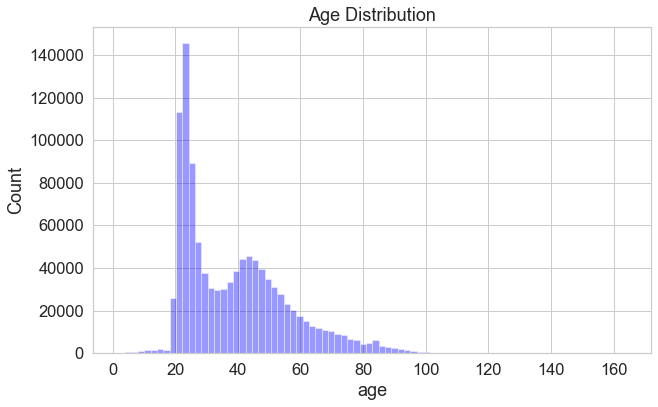

In [737]:
# Checking age distribution
with sns.plotting_context("notebook",font_scale=1.5):
    sns.set_style("whitegrid")
    sns.distplot(df["age"],
                 bins=80,
                 kde=False,
                 color="blue")
    title("Age Distribution")
    plt.ylabel("Count")

In [786]:
# Analysis by grouping

In [780]:
df.groupby(['segmentation'])['gross income'].agg(['median', 'min', 'max', 'count'])

,median,min,max,count
segmentation,,,,
01 - TOP,139182.96,3796.86,19849331.97,32019
02 - PARTICULARES,105682.65,1471.23,28894395.51,469447
03 - UNIVERSITARIO,88621.35,1202.73,28894395.51,361214


In [784]:
df.groupby(['sex'])['age'].agg(['median', 'min', 'max', 'count'])

,median,min,max,count
sex,,,,
Female,29,2,116,508345
Male,39,2,164,577948


In [785]:
df.groupby(['sex', 'segmentation'])['gross income'].mean()

sex     segmentation      
Female  01 - TOP              178909.205960
        02 - PARTICULARES     141473.475719
        03 - UNIVERSITARIO    113180.511568
Male    01 - TOP              171029.331094
        02 - PARTICULARES     137127.634665
        03 - UNIVERSITARIO    119894.267691
Name: gross income, dtype: float64

In [782]:
df.groupby(['sex', 'Province name'])[['gross income', 'age']].mean()

gross income        age
sex    Province name                          
Female ALAVA          122793.880000  44.025202
       ALBACETE        81719.204417  29.404897
       ALICANTE        83262.410348  35.256000
       ALMERIA         86782.509602  36.287204
       ASTURIAS        98981.470203  35.292284
...                             ...        ...
Male   TOLEDO          82128.578005  37.109073
       VALENCIA        88628.292617  40.330747
       VALLADOLID     102856.412953  37.768690
       ZAMORA          83954.356513  34.208353
       ZARAGOZA       110116.316605  40.478633

[104 rows x 2 columns]

In [783]:
df.groupby(['sex', 'Province name'])['gross income'].mean()

sex     Province name
Female  ALAVA            122793.880000
        ALBACETE          81719.204417
        ALICANTE          83262.410348
        ALMERIA           86782.509602
        ASTURIAS          98981.470203
                             ...      
Male    TOLEDO            82128.578005
        VALENCIA          88628.292617
        VALLADOLID       102856.412953
        ZAMORA            83954.356513
        ZARAGOZA         110116.316605
Name: gross income, Length: 104, dtype: float64

In [781]:
df.groupby(['Province name'])['gross income'].agg(['median', 'min', 'max', 'count'])

,median,min,max,count
Province name,,,,
ALAVA,116497.515,55271.07,253563.27,10
ALBACETE,77739.330,9180.00,764581.71,8653
ALICANTE,66859.080,7791.09,17804048.10,19528
ALMERIA,73255.290,8290.86,578348.88,3762
ASTURIAS,86556.720,7618.77,4950059.34,15859
AVILA,68158.365,7290.00,2768592.57,2714
BADAJOZ,61316.805,7143.54,1103543.19,13710
"BALEARS, ILLES",123413.610,5040.39,15711716.46,5513
BARCELONA,130343.085,1471.23,5752268.34,87814


In [738]:
# Extracting data of interest
df.loc[(df.Entry_Date>='2015') & (df.Entry_Date<='2020')]

,Data_Date,Customer_code,customer employee status,Uknown,sex,age,Entry_Date,customer_Status,seniority,primary_customer_Begn,...,tiprel_1mes,indresi,indext,canal_entrada,indfall,tipodom,Province name,customer_active,gross income,segmentation
0,2015-01-28,1375586,N,ES,Female,35,2015-01-12,0.0,6,1.0,...,A,S,N,KHL,N,1.0,MALAGA,1.0,87218.1,02 - PARTICULARES
27950,2015-01-28,1022482,N,ES,Female,32,2015-01-26,0.0,6,1.0,...,A,S,N,KHL,N,1.0,MADRID,1.0,174422.55,02 - PARTICULARES
29095,2015-01-28,1019691,N,ES,Male,43,2015-01-06,0.0,6,1.0,...,I,S,N,KAT,N,1.0,MADRID,0.0,97710.81,02 - PARTICULARES
40527,2015-01-28,1104096,N,ES,Male,30,2015-01-08,0.0,6,1.0,...,A,S,N,KHL,N,1.0,MADRID,1.0,103798.56,02 - PARTICULARES
49788,2015-01-28,1124195,N,ES,Male,34,2015-01-19,0.0,6,1.0,...,A,S,N,KAT,N,1.0,MADRID,1.0,110703.36,02 - PARTICULARES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927790,2016-06-28,664089,N,ES,Female,43,2015-02-23,0.0,16,1.0,...,A,S,N,KFC,N,1.0,MADRID,1.0,117038.22,02 - PARTICULARES
928468,2016-06-28,657817,N,ES,Male,32,2016-05-12,1.0,1,1.0,...,A,S,N,KHM,N,1.0,BARCELONA,0.0,NA,02 - PARTICULARES
928733,2016-06-28,660848,N,ES,Female,59,2016-02-24,0.0,115,1.0,...,A,S,N,KAT,N,1.0,GIPUZKOA,1.0,NA,02 - PARTICULARES
928794,2016-06-28,660913,N,ES,Female,49,2016-01-06,0.0,115,1.0,...,A,S,N,KFC,N,1.0,MALAGA,1.0,NA,02 - PARTICULARES


In [798]:
#Converting Sex column to numerical data for further analysis 
df= pd.get_dummies(df, columns = ['sex'])

In [799]:
df

,Data_Date,Customer_code,customer employee status,Uknown,age,Entry_Date,customer_Status,seniority,primary_customer_Begn,indrel_1mes,...,indext,canal_entrada,indfall,tipodom,Province name,customer_active,gross income,segmentation,sex_Female,sex_Male
0,2015-01-28,1375586,N,ES,35,2015-01-12,0.0,6,1.0,1.0,...,N,KHL,N,1.0,MALAGA,1.0,87218.10,02 - PARTICULARES,1,0
1,2015-01-28,1050611,N,ES,23,2012-08-10,0.0,35,1.0,1.0,...,S,KHE,N,1.0,CIUDAD REAL,0.0,35548.74,03 - UNIVERSITARIO,0,1
2,2015-01-28,1050612,N,ES,23,2012-08-10,0.0,35,1.0,1.0,...,N,KHE,N,1.0,CIUDAD REAL,0.0,122179.11,03 - UNIVERSITARIO,0,1
3,2015-01-28,1050613,N,ES,22,2012-08-10,0.0,35,1.0,1.0,...,N,KHD,N,1.0,ZARAGOZA,0.0,119775.54,03 - UNIVERSITARIO,1,0
5,2015-01-28,1050615,N,ES,23,2012-08-10,0.0,35,1.0,1.0,...,N,KHE,N,1.0,TOLEDO,0.0,22220.04,03 - UNIVERSITARIO,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929610,2016-06-28,660237,N,ES,55,1999-04-21,0.0,206,1.0,1.0,...,N,KAT,N,1.0,MADRID,1.0,128643.57,01 - TOP,0,1
929611,2016-06-28,660238,N,ES,30,2006-11-29,0.0,115,1.0,1.0,...,N,KFC,N,1.0,"RIOJA, LA",0.0,NaN,02 - PARTICULARES,0,1
929612,2016-06-28,660240,N,ES,52,2006-11-29,0.0,115,1.0,1.0,...,N,KBZ,N,1.0,ASTURIAS,1.0,72765.27,02 - PARTICULARES,0,1
929613,2016-06-28,660243,N,ES,32,2006-11-29,0.0,115,1.0,1.0,...,N,KFC,N,1.0,ASTURIAS,0.0,147488.88,02 - PARTICULARES,0,1


In [816]:
# Checking the median date
dates=df.loc[:,"Entry_Date"].sort_values().reset_index()
median_date = int(np.median(dates.index.values))
df.loc[df.Entry_Date.isnull(),""] = dates.loc[median_date,"Entry_Date"]
df["Entry_Date"].describe()

<ipython-input-816-02884cc31e5f>:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df["Entry_Date"].describe()


count                 1086293
unique                   6750
top       2014-07-28 00:00:00
freq                     5987
first     1995-01-16 00:00:00
last      2016-05-31 00:00:00
Name: Entry_Date, dtype: object

In [752]:
df.isnull().any()

Data_Date                   False
Customer_code               False
customer employee status    False
Uknown                      False
sex                         False
age                         False
Entry_Date                  False
customer_Status             False
seniority                   False
primary_customer_Begn       False
indrel_1mes                 False
tiprel_1mes                 False
indresi                     False
indext                      False
canal_entrada               False
indfall                     False
tipodom                     False
Province name               False
customer_active             False
gross income                 True
segmentation                False
dtype: bool

In [441]:
df.columns

Index(['Data_Date', 'Customer_code', 'customer employee status', '', 'age',
       'Entry_Date', 'customer_Status', 'seniority', 'primary_customer_Begn',
       'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext', 'canal_entrada',
       'indfall', 'tipodom', 'Province name', 'customer_active',
       'gross income', 'segmentation', 'sex_Female', 'sex_Male'],
      dtype='object')

In [442]:
df.describe()

,Customer_code,age,customer_Status,seniority,primary_customer_Begn,indrel_1mes,tipodom,customer_active,gross income,sex_Female,sex_Male
count,9.174900e+04,91749.000000,91749.000000,91749.000000,91749.000000,91749.0,91749.0,91749.000000,9.174900e+04,91749.000000,91749.000000
mean,8.636488e+05,39.235120,0.000589,78.742112,1.083314,1.0,1.0,0.436822,1.309135e+05,0.465302,0.534698
std,3.997596e+05,16.953186,0.024253,63.894108,2.856212,0.0,0.0,0.495995,2.452976e+05,0.498797,0.498797
min,1.590000e+04,3.000000,0.000000,1.000000,1.000000,1.0,1.0,0.000000,5.163750e+03,0.000000,0.000000
25%,5.331620e+05,24.000000,0.000000,32.000000,1.000000,1.0,1.0,0.000000,6.707496e+04,0.000000,0.000000
50%,9.712490e+05,36.000000,0.000000,47.000000,1.000000,1.0,1.0,0.000000,9.895386e+04,0.000000,1.000000
75%,1.175160e+06,49.000000,0.000000,127.000000,1.000000,1.0,1.0,1.000000,1.513765e+05,1.000000,1.000000
max,1.454617e+06,114.000000,1.000000,257.000000,99.000000,1.0,1.0,1.000000,2.889440e+07,1.000000,1.000000


In [753]:
 [df['gross income']>200000]

[0         False
 1         False
 2         False
 3         False
 5         False
           ...  
 929610    False
 929611    False
 929612    False
 929613    False
 929614    False
 Name: gross income, Length: 1086293, dtype: bool]

In [205]:
# Extracting numeric columns for further analysis
x = ['age','gross income','seniority']

In [206]:
SantanderInt= df.loc[:,x]

In [207]:
SantanderInt = df.loc[:, x].dropna()

In [208]:
SantanderInt.isnull().sum()

age             0
gross income    0
seniority       0
dtype: int64

In [209]:
SantanderInt.describe()

,age,gross income,seniority
count,864645.000000,8.646450e+05,864645.000000
mean,39.216312,1.307378e+05,76.455775
std,16.942886,2.212868e+05,1522.343045
min,2.000000,1.202730e+03,-999999.000000
25%,24.000000,6.715683e+04,32.000000
50%,36.000000,9.905319e+04,47.000000
75%,49.000000,1.514654e+05,127.000000
max,127.000000,2.889440e+07,257.000000


In [210]:
SantanderInt["gross income"].isna().sum()

0

In [211]:
SantanderInt["gross income"].isna().sum()

0

In [212]:
SantanderInt['gross income'].dropna(inplace=True)

In [213]:
SantanderInt.dropna(inplace=True)

In [214]:
SantanderInt[SantanderInt.notnull()]

,age,gross income,seniority
0,35.0,87218.10,6.0
1,23.0,35548.74,35.0
2,23.0,122179.11,35.0
3,22.0,119775.54,35.0
5,23.0,22220.04,35.0
...,...,...,...
929608,39.0,70852.20,115.0
929609,36.0,100647.45,113.0
929610,55.0,128643.57,206.0
929612,52.0,72765.27,115.0


In [174]:
SantanderInt

,age,gross income,seniority
0,35.0,87218.1,6.0
1,23.0,35548.74,35.0
2,23.0,122179.11,35.0
3,22.0,119775.54,35.0
5,23.0,22220.04,35.0
...,...,...,...
929610,55.0,128643.57,206.0
929611,30.0,NA,115.0
929612,52.0,72765.27,115.0
929613,32.0,147488.88,115.0


In [240]:
SantanderInt= SantanderInt.apply(pd.to_numeric, errors='coerce', axis=1)

In [241]:
SantanderInt.isnull().sum(axis=0)

age             0
gross income    0
seniority       0
dtype: int64

In [242]:
SantanderInt.isna().sum()

age             0
gross income    0
seniority       0
dtype: int64

In [154]:
SantanderInt['age'] = SantanderInt['age'].astype(float)

In [157]:
SantanderInt['seniority'] = SantanderInt['seniority'].astype(float)

In [243]:
SantanderInt.dtypes

age             float64
gross income    float64
seniority       float64
dtype: object

In [244]:
SantanderInt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 864645 entries, 0 to 929613
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   age           864645 non-null  float64
 1   gross income  864645 non-null  float64
 2   seniority     864645 non-null  float64
dtypes: float64(3)
memory usage: 26.4 MB


In [767]:
# Testing for normality using the shapiro and confirming with the QQplot
def testnorm(var, SantanderInt):
    stat, p = scistat.shapiro(SantanderInt[var])
    return p

In [768]:
testnorm("gross income", SantanderInt)

C:\Users\trymo\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


0.0

In [769]:
testnorm("age", SantanderInt)

0.0

In [770]:
testnorm("seniority", SantanderInt)

0.0

###### All the P values are less than 0.05 ,which means that non of them are normally distributed

In [ ]:
# Testing variables using the QQPlot

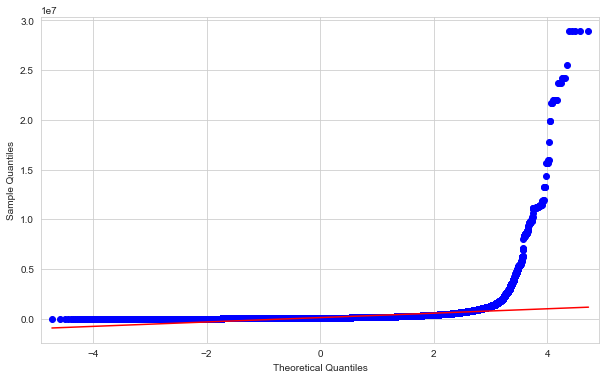

In [771]:
fig = sm.qqplot(SantanderInt['gross income'],line='s')
plt.show()

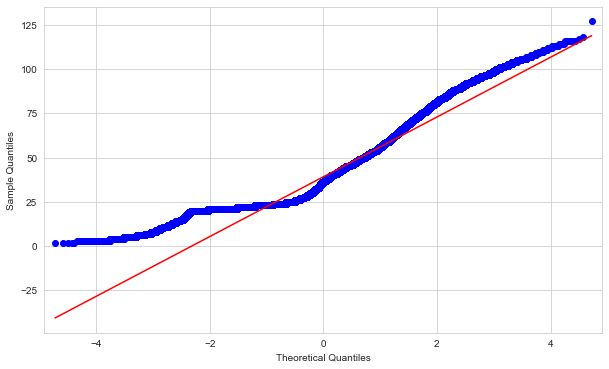

In [772]:
fig = sm.qqplot(SantanderInt['age'],line='s')
plt.show()

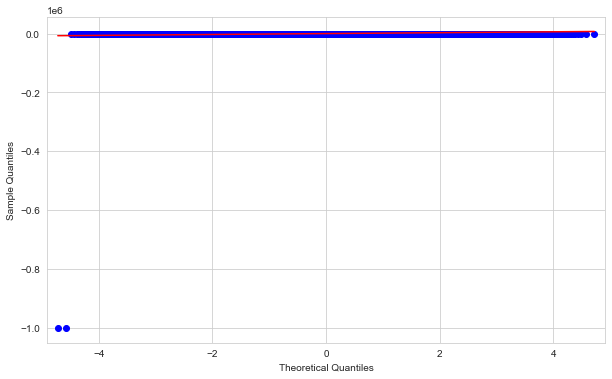

In [773]:
fig = sm.qqplot(SantanderInt['seniority'],line='s')
plt.show()

In [21]:
# Detecting outliers using the general stats technique
thirdQ = SantanderInt['gross income'].quantile(0.75)
firstQ = SantanderInt['gross income'].quantile(0.25)

outlierRange = 1.5*(thirdQ - firstQ)

In [22]:
outlierHigh = thirdQ + outlierRange

In [23]:
outlierHigh

277928.13

In [24]:
lowoutlier = firstQ - outlierRange

In [25]:
lowoutlier

-59305.95

In [26]:
x = ['age','gross income','seniority']

In [27]:
def getOuliers():
    dfOut = pd.DataFrame(columns=SantanderInt.columns, data=None)
    
    for col in SantanderInt.columns[1:]:
        thirdQ = SantanderInt[col].quantile(0.75)
        firstQ = SantanderInt[col].quantile(0.25)
        outlierRange = 1.5*(thirdQ - firstQ)
        lowOutlier = firstQ - outlierRange
        highOutlier = thirdQ + outlierRange
        
        df = SantanderInt.loc[(SantanderInt[col] > highOutlier) | (SantanderInt[col] < lowOutlier)]
        
        df = df.assign(varname = col, threshlow = lowOutlier, threshhigh = highOutlier)
        
        dfOut = pd.concat([dfOut, df])
    
    return dfOut
        

In [28]:
outliers = getOuliers()

In [29]:
outliers 

,age,gross income,seniority,varname,threshlow,threshhigh
6,23.0,295590.36,35.0,gross income,-59305.95,277928.13
58,23.0,289211.40,35.0,gross income,-59305.95,277928.13
158,29.0,323722.50,35.0,gross income,-59305.95,277928.13
168,60.0,330939.12,35.0,gross income,-59305.95,277928.13
181,23.0,640168.26,35.0,gross income,-59305.95,277928.13
...,...,...,...,...,...,...
929535,41.0,378961.50,115.0,gross income,-59305.95,277928.13
929543,73.0,305925.96,16.0,gross income,-59305.95,277928.13
675528,52.0,198122.16,-999999.0,seniority,-120.00,264.00
691043,67.0,173862.36,-999999.0,seniority,-120.00,264.00


In [30]:
SantanderInt.corr(method="pearson")

,age,gross income,seniority
age,1.000000,0.067896,0.021781
gross income,0.067896,1.000000,0.003018
seniority,0.021781,0.003018,1.000000


In [31]:
SantanderInt['Gross_Income_q'] = pd.qcut(SantanderInt['gross income'],
                                          labels = ['very low', 'low', 'medium', 'high', 'very high']
                                          , q = 5
                                          , precision=0)

SantanderInt['Age_Years_q'] = pd.qcut(SantanderInt['age'],
                                          labels = ['very low', 'low', 'medium', 'high', 'very high']
                                          , q = 5
                                          , precision=0)

In [32]:
pd.crosstab(SantanderInt.Gross_Income_q, SantanderInt.Age_Years_q)

Age_Years_q,very low,low,medium,high,very high
Gross_Income_q,,,,,
very low,38168,48911,35020,27883,22947
low,34718,42577,35485,32613,27536
medium,32604,38772,32765,36279,32509
high,29230,33123,30084,40990,39508
very high,25294,29174,26822,40108,51525


In [33]:
SantanderInt.loc[(SantanderInt.Gross_Income_q=='very high') & (SantanderInt.Age_Years_q=='medium')]

,age,gross income,seniority,Gross_Income_q,Age_Years_q
39,32.0,171398.85,35.0,very high,medium
191,32.0,195550.95,35.0,very high,medium
220,30.0,182521.62,35.0,very high,medium
392,35.0,371313.09,35.0,very high,medium
425,30.0,186640.32,35.0,very high,medium
...,...,...,...,...,...
929527,39.0,175518.57,115.0,very high,medium
929532,30.0,208795.20,14.0,very high,medium
929535,41.0,378961.50,115.0,very high,medium
929589,40.0,172893.33,115.0,very high,medium


In [34]:
# Regression Plot

[Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'Gross Income'),
 Text(0.5, 1.0, 'Gross Income vs Age')]

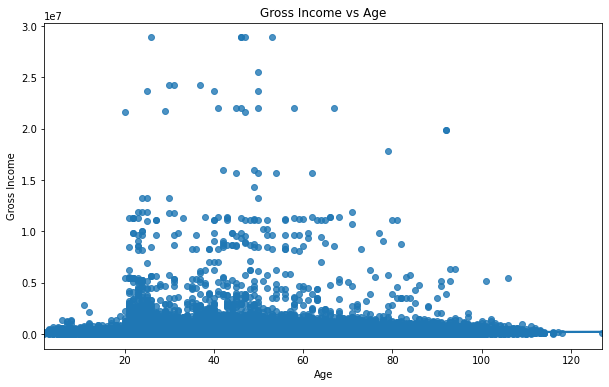

In [40]:
myPlotData = sns.regplot(x='age', y='gross income', data=SantanderInt)
myPlotData.set(xlabel="Age", ylabel="Gross Income", title="Gross Income vs Age")

In [478]:
# Detecting outliers using the general stats technique
thirdQ = SantanderInt['age'].quantile(0.75)
firstQ = SantanderInt['age'].quantile(0.25)

outlierRange = 1.5*(thirdQ - firstQ)

In [479]:
outlierHigh1 = thirdQ + outlierRange

In [480]:
outlierHigh1

86.5

In [481]:
lowoutlier1 = firstQ - outlierRange

In [482]:
lowoutlier1

-13.5

In [483]:
 SantanderInt['age'].min()

3.0

In [809]:
SantanderInt['age'].max()

127.0

In [808]:
df['age'].min()

2

In [810]:
df['age'].max()

164

In [807]:
#Extracting some inconsistent data 

df.loc[(df.age==2)]

,Data_Date,Customer_code,customer employee status,Uknown,age,Entry_Date,customer_Status,seniority,primary_customer_Begn,indrel_1mes,...,indext,canal_entrada,indfall,tipodom,Province name,customer_active,gross income,segmentation,sex_Female,sex_Male
159249,2015-01-28,1297114,N,ES,2,2014-08-18,0.0,11,1.0,1.0,...,N,KFA,N,1.0,MALAGA,1.0,121736.16,02 - PARTICULARES,0,1
266798,2016-06-28,1432524,N,ES,2,2015-08-10,0.0,10,1.0,1.0,...,N,KFC,N,1.0,OURENSE,1.0,20855.97,02 - PARTICULARES,1,0
282964,2016-06-28,1448310,N,ES,2,2015-09-14,0.0,9,1.0,1.0,...,N,KFC,N,1.0,NAVARRA,1.0,NaN,02 - PARTICULARES,1,0
285287,2016-06-28,1436341,N,ES,2,2015-08-18,0.0,10,1.0,1.0,...,N,KAT,N,1.0,MADRID,1.0,177022.71,02 - PARTICULARES,1,0
292092,2016-06-28,1532079,N,ES,2,2016-02-19,1.0,4,1.0,1.0,...,N,KFC,N,1.0,MADRID,1.0,NaN,02 - PARTICULARES,0,1
292858,2016-06-28,1533417,N,ES,2,2016-02-22,1.0,4,1.0,1.0,...,N,KFC,N,1.0,MURCIA,1.0,NaN,02 - PARTICULARES,1,0
294714,2016-06-28,1530936,N,ES,2,2016-02-19,1.0,4,1.0,1.0,...,N,KFC,N,1.0,MADRID,1.0,NaN,02 - PARTICULARES,1,0
295166,2016-06-28,1530317,N,ES,2,2016-02-05,1.0,4,1.0,1.0,...,N,KFA,N,1.0,MADRID,1.0,NaN,02 - PARTICULARES,0,1
297436,2016-06-28,1534810,N,ES,2,2016-02-26,1.0,4,1.0,1.0,...,N,KFC,N,1.0,MADRID,0.0,NaN,02 - PARTICULARES,0,1
298082,2016-06-28,1534466,N,ES,2,2016-02-29,1.0,4,1.0,1.0,...,N,KFC,N,1.0,VALENCIA,1.0,NaN,02 - PARTICULARES,1,0


In [812]:
# Guided by the outlier limits to Make the data more sensible 
df.loc[df.age < 18,"age"]  = df.loc[(df.age >= 18) & (df.age <= 30),"age"].mean(skipna=True)
df.loc[df.age> 87,"age"] = df.loc[(df.age >= 30) & (df.age <= 87),"age"].mean(skipna=True)
df["age"].fillna(df["age"].mean(),inplace=True)
df["age"] = df["age"].astype(int)

In [486]:
df

,Data_Date,Customer_code,customer employee status,,age,Entry_Date,customer_Status,seniority,primary_customer_Begn,indrel_1mes,...,indext,canal_entrada,indfall,tipodom,Province name,customer_active,gross income,segmentation,sex_Female,sex_Male
452944,2016-06-28,1374289,N,ES,47,2015-01-05,0.0,17,1.0,1.0,...,N,KHK,N,1.0,BARCELONA,1.0,101012.46,01 - TOP,0,1
1508,2016-06-28,1171104,N,ES,22,2013-08-29,0.0,34,1.0,1.0,...,N,KHE,N,1.0,BARCELONA,0.0,106170.96,03 - UNIVERSITARIO,0,1
131076,2015-01-28,1007541,N,ES,39,2012-03-05,0.0,40,1.0,1.0,...,N,KFC,N,1.0,MADRID,1.0,193578.90,02 - PARTICULARES,0,1
863672,2016-06-28,539702,N,ES,70,2005-07-04,0.0,131,1.0,1.0,...,N,KBZ,N,1.0,MADRID,0.0,332776.50,02 - PARTICULARES,1,0
534709,2016-06-28,439079,N,ES,45,2003-10-09,0.0,152,1.0,1.0,...,S,KFC,N,1.0,BARCELONA,0.0,177364.41,02 - PARTICULARES,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181766,2016-06-28,1095916,N,ES,26,2012-11-06,0.0,43,1.0,1.0,...,N,KHE,N,1.0,BARCELONA,0.0,121590.21,03 - UNIVERSITARIO,1,0
150586,2016-06-28,985977,N,ES,25,2011-11-28,0.0,55,1.0,1.0,...,N,KHE,N,1.0,SEVILLA,0.0,106114.53,03 - UNIVERSITARIO,0,1
21275,2015-01-28,1023639,N,ES,42,2012-07-16,0.0,36,1.0,1.0,...,N,KFC,N,1.0,MADRID,1.0,207923.49,02 - PARTICULARES,0,1
75250,2015-01-28,1083542,N,ES,26,2012-10-18,0.0,33,1.0,1.0,...,N,KEH,N,1.0,BARCELONA,0.0,65336.79,03 - UNIVERSITARIO,1,0


In [813]:
df['age'].min()

18

In [814]:
df['age'].max()

87

In [528]:
def iqr(df):
    return df.quantile(0.75) - df.quantile(0.25)

In [529]:
agg= {'gross income':['count', 'mean', 'max', iqr], 'age':['count', 'min', 'max', iqr]}

In [531]:
df.groupby(['gross income']).agg(agg)

gross income                                  age             
                    count         mean          max  iqr count min max  iqr
gross income                                                               
1471.23                 1      1471.23      1471.23  0.0     1  64  64  0.0
2336.01                 1      2336.01      2336.01  0.0     1  52  52  0.0
3796.86                 2      3796.86      3796.86  0.0     2  55  55  0.0
4559.55                 1      4559.55      4559.55  0.0     1  24  24  0.0
5925.54                 1      5925.54      5925.54  0.0     1  51  51  0.0
...                   ...          ...          ...  ...   ...  ..  ..  ...
11139895.56             2  11139895.56  11139895.56  0.0     2  63  64  0.5
11381526.03             1  11381526.03  11381526.03  0.0     1  43  43  0.0
11411517.27             1  11411517.27  11411517.27  0.0     1  66  66  0.0
11857856.46             1  11857856.46  11857856.46  0.0     1  71  71  0.0
22034738.76             1  22034738.76  22034738.76  0.0     1  58  58  0.0

[83931 rows x 8 columns]

In [ ]:
# Fitting a regression model to check for anomalies

In [245]:
from sklearn.preprocessing import StandardScaler

In [246]:
standardizer = StandardScaler()

In [247]:
vars =['age','seniority']

In [248]:
var = df.loc[:, vars].dropna()

In [249]:
varn = varknn.dropna(axis=1)

In [250]:
Reg_varx= df.loc[:, varn]

In [251]:
Reg_varx.head(2)

,age,seniority
0,35.0,6.0
1,23.0,35.0


In [252]:
vary=['gross income']

In [253]:
Reg_vary = df.loc[:, vary]

In [254]:
Reg_vary.head(2)

,gross income
0,87218.10
1,35548.74


In [287]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [288]:
X_train, X_test, y_train, y_test = train_test_split(Reg_varx , Reg_vary, test_size=0.20)

In [289]:
X_train.dropna()

,age,seniority
167946,22.0,10.0
280592,21.0,9.0
429278,29.0,13.0
812420,25.0,59.0
642071,45.0,162.0
...,...,...
316358,49.0,2.0
301357,35.0,6.0
59070,69.0,29.0
432256,47.0,12.0


In [290]:
X_train = X_train.fillna(X_train.mean())

In [305]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [292]:
scaler.fit(X_test)

StandardScaler()

In [293]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [294]:
X_train

array([[-0.98087021, -0.02758262],
       [-1.04039652, -0.02805724],
       [-0.56418604, -0.02615875],
       ...,
       [ 1.81686636, -0.0185648 ],
       [ 0.50728754, -0.02663338],
       [ 0.56681385,  0.00279321]])

In [295]:
X_test

array([[-1.09992283, -0.02900649],
       [ 0.03107706,  0.01750651],
       [ 1.10255064, -0.01951404],
       ...,
       [ 0.15012968, -0.01998866],
       [-0.9213439 , -0.01097084],
       [-0.80229128, -0.01571706]])

In [303]:
from sklearn import linear_model

In [297]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)


(903692, 2)
(225923, 2)
(903692, 1)
(225923, 1)


In [298]:
np.any(np.isnan(X_train))

False

np.any(np.isnan(y_train))

In [300]:
y_train = y_train.fillna(X_train.mean())

In [309]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [311]:
X_train= sm.add_constant(X_train)

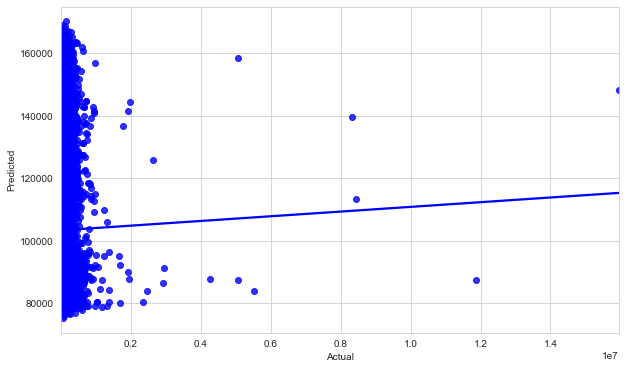

In [372]:
sns.regplot(x=y_test,y=predicted,ci=None,color ='blue');
plt.xlabel('Actual');
plt.ylabel('Predicted');
plt.show()

###### The data has a lot of discrepancies

In [ ]:
# End thank you